# PROYECTO INDIVIDUAL 2

## 1) Importación de librerías

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

from PIL import Image

from datetime import datetime

## 2) Lectura de archivo csv como dataframe

In [2]:
df=pd.read_csv('AccidentesAviones.csv') 

# Vemos las primeras 5 filas del dataset
df.head() 

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [3]:
# Vemos cantidad de filas y columnas del dataframe
df.shape

(5008, 18)

## 3) Entendiendo los datos

### a) Diccionario de datos

In [4]:
# Es necesario saber qué información brinda cada campo del dataset. Si bien algunos tienen un nombre claro, hay otros que no. Por esto es que buscamos el significado de los campos.

In [5]:
'''
Diccionario de datos

fecha: fecha del accidente.
HORA declarada: hora del accidente.
Ruta: lugar del accidente.
OperadOR: aerolínea o operador de la aeronave.
flight_no: numero de vuelo asignado a la aeronave por un operador.
route: ruta completa o parcial del vuelo.
ac_type: tipo de aeronave.
registration: registro ICAO de la aeronave.
cn_ln: numero serial o de construcción / numero de línea de fuselaje.
all_aboard: total de personas a bordo.
PASAJEROS A BORDO: cantidad de pasajeros a bordo.
crew_aboard: cantidad de tripulación a bordo.
cantidad de fallecidos: total de fallecidos.
passenger_fatalities: pasajeros fallecidos.
crew_fatalities: tripulación fallecida.
ground: total de fallecidos en el suelo.
summary: breve descripción del accidente y su cause (si se conoce).

'''

'\nDiccionario de datos\n\nfecha: fecha del accidente.\nHORA declarada: hora del accidente.\nRuta: lugar del accidente.\nOperadOR: aerolínea o operador de la aeronave.\nflight_no: numero de vuelo asignado a la aeronave por un operador.\nroute: ruta completa o parcial del vuelo.\nac_type: tipo de aeronave.\nregistration: registro ICAO de la aeronave.\ncn_ln: numero serial o de construcción / numero de línea de fuselaje.\nall_aboard: total de personas a bordo.\nPASAJEROS A BORDO: cantidad de pasajeros a bordo.\ncrew_aboard: cantidad de tripulación a bordo.\ncantidad de fallecidos: total de fallecidos.\npassenger_fatalities: pasajeros fallecidos.\ncrew_fatalities: tripulación fallecida.\nground: total de fallecidos en el suelo.\nsummary: breve descripción del accidente y su cause (si se conoce).\n\n'

In [6]:
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [7]:
# Renombramos los campos para todas tengan el mismo formato.
df.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'airline_operator',
                    'flight_no': 'flight_no',
                    'ac_type': 'aircraft_type',
                    'registration': 'aircraft_registration',
                    'cn_ln': 'construction_fuselage_number',
                    'all_aboard': 'total_aboard',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'crew_aboard': 'crew_aboard',
                    'cantidad de fallecidos': 'total_fatalities',
                    'passenger_fatalities': 'passengers_fatalities',
                    'crew_fatalities': 'crew_fatalities',
                    'ground': 'total_killed_ground',
                    'summary': 'summary'
}, inplace=True)
df.head(1)

,Unnamed: 0,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


In [8]:
# Analizamos las columnas y los tipos de datos
df.info()
# Parece que casi no hay nulos, pero los nulos en el dataset están como "?"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    5008 non-null   int64 
 1   date                          5008 non-null   object
 2   time                          5008 non-null   object
 3   location                      5008 non-null   object
 4   airline_operator              5008 non-null   object
 5   flight_no                     5008 non-null   object
 6   route                         5008 non-null   object
 7   aircraft_type                 5008 non-null   object
 8   aircraft_registration         5008 non-null   object
 9   construction_fuselage_number  5008 non-null   object
 10  total_aboard                  5008 non-null   object
 11  passengers_aboard             5008 non-null   object
 12  crew_aboard                   5008 non-null   object
 13  total_fatalities  

### b) Elimino las columnas que no nos aportarán en el análisis

In [9]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'location', 'airline_operator',
       'flight_no', 'route', 'aircraft_type', 'aircraft_registration',
       'construction_fuselage_number', 'total_aboard', 'passengers_aboard',
       'crew_aboard', 'total_fatalities', 'passengers_fatalities',
       'crew_fatalities', 'total_killed_ground', 'summary'],
      dtype='object')

In [10]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis. 
df.drop(columns=['Unnamed: 0', 'aircraft_registration', 'flight_no', 'construction_fuselage_number', 'total_killed_ground'], inplace = True)
df.columns

Index(['date', 'time', 'location', 'airline_operator', 'route',
       'aircraft_type', 'total_aboard', 'passengers_aboard', 'crew_aboard',
       'total_fatalities', 'passengers_fatalities', 'crew_fatalities',
       'summary'],
      dtype='object')

In [11]:
df.shape

(5008, 13)

### c) Transformaciones

T1: 'date'

In [12]:
df['date'].head()
# El campo 'date' tiene el formato mm(en texto) dd, AAAA. Para un mejor análisis le vamos a dar el formato AAAA-mm-dd

0    September 17, 1908
1    September 07, 1909
2         July 12, 1912
3       August 06, 1913
4    September 09, 1913
Name: date, dtype: object

In [13]:
from datetime import datetime

# Creamos la función para convertir la fecha al formato AAAA-mm-dd
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    fecha_transformada = fecha_objeto.strftime('%Y-%m-%d')
    return fecha_transformada

# Aplicamos la conversión
df['date'] = df['date'].apply(convertir_fecha)

# Reemplazamos los valores nulos por un valor vacío
df['date'] = df['date'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['date'] = df['date'].str.replace('?', '')

# Cambiamos el campo 'date' al tipo fecha
df['date'] = pd.to_datetime(df['date'])
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\369992520.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['date'] = df['date'].str.replace('?', '')


In [14]:
# Revisamos los valores
df['date'].head()

0   1908-09-17
1   1909-09-07
2   1912-07-12
3   1913-08-06
4   1913-09-09
Name: date, dtype: datetime64[ns]

T2: 'time'

In [15]:
df['time'].head()
# El campo 'time' tiene el formato militar, lo convertiremos al formato HH:mm, además también cambiaremos los '?' por vacíos.

0    1718
1       ?
2    0630
3       ?
4    1830
Name: time, dtype: object

In [16]:

# Reemplazamos los valores de ? por un valor vacío.
df['time'] = df['time'].str.replace('?', '')

# Notamos que hay algunos datos que tienen valores extra además de la hora, como letras. Las borramos.
df['time'] = df['time'].str.replace(';', ':')
df['time'] = df['time'].str.replace('0', '00:00')
df['time'] = df['time'].str.replace('Z', '')
df['time'] = df['time'].str.replace('c: ', '')
df['time'] = df['time'].str.replace('c:', '')
df['time'] = df['time'].str.replace('c', '')
df['time'] = df['time'].str.replace('114', '1:40') 

# Creamos la función para convertir la hora al formato HH:mm
import datetime
def convertir_hora(hora):
    if hora is None:
        return None   
    hora_str = str(hora)    
    if len(hora_str) == 4:
        hora_str = f"{hora_str[:2]}:{hora_str[2:]}"
    elif len(hora_str) == 3:
        hora_str = f"{hora_str[0]}:{hora_str[1:]}"    
    try:
        datetime.datetime.strptime(hora_str, "%H:%M")
        return hora_str
    except ValueError:
        return None

# Aplicamos la conversión
df['time'] = df['time'].apply(convertir_hora)

# Reemplazamos los valores nulos por un valor vacío
df['time'] = df['time'].fillna('')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\2272516267.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['time'] = df['time'].str.replace('?', '')


T3: 'location'

In [17]:
df['location'].head()
# El campo 'location' contiene regiones del mundo, en algunos casos es una ciudad con el país donde se encuentra,
# en otros casos es una ciudad y el estado donde está.
# Es por esto que se normalizará la posición geográfica, obteniendo como resultado sólo el país

0                   Fort Myer, Virginia
1               Juvisy-sur-Orge, France
2             Atlantic City, New Jersey
3    Victoria, British Columbia, Canada
4                    Over the North Sea
Name: location, dtype: object

In [18]:
df.location.nunique()
# Notamos que hay muchas localizaciones únicas, si nuestro resultado final es el país, deberían haber menos de 195.

4125

In [19]:
# Reemplazamos los valores nulos por un valor vacío
df['location'] = df['location'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['location'] = df['location'].str.replace('?', '')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\1000283751.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['location'] = df['location'].str.replace('?', '')


In [20]:
# Modificaremos la columna 'location' para quedarnos sólo con su país, según las coincidencias con la siguiente lista creada con ChatGPT3.

lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "Island", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [21]:
# Creamos la función que colocará el nombre del país de 'location' en 'country',
# si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

df['country'] = df['location'].apply(obtener_pais)

In [22]:
# Hacemos lo mismo pero para los estados de Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df.loc[df['location'].str.contains('|'.join(states_usa), case=False, na=False), 'country'] = 'United States'

In [23]:
df.country.unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Island', 'Denmark', 'Italy', 'Spain', 'Australia',
       'China', 'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'Hungary', 'Mauritania', 'Slovakia', 'Algeria', 'Finland',
       'Uruguay', 'Brazil', 'Netherlands', 'Greece', 'Mexico', 'Cuba',
       'Iran', 'Madagascar', 'Argentina', 'New Zealand', 'Bulgaria',
       'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia',
       'Ukraine', 'Peru', 'Syria', 'Pakistan', 'Egypt', 'Honduras',
       'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway', 'Croatia',
       'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan', 'Samoa',
       'India', 'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador',
       'Malta', 'Indonesia', 'Scotland', 'Estonia', 'Puerto Rico',
       'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal', 'Guyana',
       'Ireland', 'Nicaragua', 'Philippines', 'Bahamas', 'Liberia',
       'Niger',

In [24]:
# Como se puede observar, sólo nos quedamos con el país y se obtuvieron 157 paises distintos más el valor 'other'.
df.country.nunique()

158

T4: 'airline_operator'

In [25]:
# Analizamos operadores de aerolíneas.
df.airline_operator.unique()

array(['Military - U.S. Army', '?', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [26]:
# Reemplazamos los valores nulos por un valor vacío.
df['airline_operator'] = df['airline_operator'].fillna('')

# Reemplazamos los valores de ? por un valor vacío.
df['airline_operator'] = df['airline_operator'].str.replace('?', '')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\2734161957.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['airline_operator'] = df['airline_operator'].str.replace('?', '')


In [ ]:
# Obtenemos los valores únicos de la columna 'airline_operator'
valores_unicos = df['airline_operator'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

In [28]:
df.airline_operator.nunique()

2268

In [29]:
# Verificamos si alguna de las palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y No militar
df['category'] = np.where(df['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'non-military')

In [30]:
# Controlamos
df_grouped = df['category'].value_counts()
df_grouped

non-military    4217
military         791
Name: category, dtype: int64

In [31]:
df.head()

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,"During a demonstration flight, a U.S. Army fly...",United States,military
1,1909-09-07,,"Juvisy-sur-Orge, France",,Air show,Wright Byplane,1,0,1,1,0,0,Eugene Lefebvre was the first pilot to ever be...,France,non-military
2,1912-07-12,,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,First U.S. dirigible Akron exploded just offsh...,United States,military
3,1913-08-06,,"Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1,0,1,1,0,1,The first fatal airplane accident in Canada oc...,Canada,non-military
4,1913-09-09,,Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,military


T5: 'route'

In [32]:
# Analizamos las rutas
df.route.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [33]:
# Reemplazamos los valores nulos por un valor vacío.
df['route'] = df['route'].fillna('')

# Reemplazamos los valores de ? por un valor vacío.
df['route'] = df['route'].str.replace('?', '')

# Obtenemos los valores únicos de la columna 'route'.
valores_unicos = df['route'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\3948360239.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['route'] = df['route'].str.replace('?', '')


In [34]:
df.route.nunique()
# Como hay más de 1 valor dentro de las rutas, consideramos que no es posible hacer transformaciones sobre los valores en este paso
# ya que no podemos saber en qué tramo ocurrió el accidente.

3839

T6: 'aircraft_type'

In [35]:
df['aircraft_type'].head()

0          Wright Flyer III
1            Wright Byplane
2                 Dirigible
3          Curtiss seaplane
4    Zeppelin L-1 (airship)
Name: aircraft_type, dtype: object

In [36]:
# Nos limitamos a reemplazar nulos y '?' por vacíos
# Reemplazamos los valores nulos por un valor vacío
df['aircraft_type'] = df['aircraft_type'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['aircraft_type'] = df['aircraft_type'].str.replace('?', '')

df.aircraft_type.nunique()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\3130882587.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['aircraft_type'] = df['aircraft_type'].str.replace('?', '')


2469

T7: 'total_aboard'

In [37]:
df['total_aboard'].head()

0     2
1     1
2     5
3     1
4    20
Name: total_aboard, dtype: object

In [38]:
df.total_aboard.isna().sum()

0

In [39]:
# Reemplazamos los valores nulos por un valor vacío
df['total_aboard'] = df['total_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_aboard'] = df['total_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_aboard'] = pd.to_numeric(df['total_aboard'], errors='coerce')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\711911882.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_aboard'] = df['total_aboard'].str.replace('?', '')


In [40]:
# Contamos la cantidad de filas con vacíos en total_aboard
df['total_aboard'].isna().sum()

17

In [41]:
# Tomamos el criterio de eliminar registros con 'total_aboard' vacío
df = df.dropna(subset=['total_aboard'])

In [42]:
df.total_aboard.isna().sum()

0

In [43]:
# Y también eliminamos los registros donde 'total_aboard' es igual a 0, ya que no puede haber una aeronave sin personas a bordo.
df = df.drop(df[df['total_aboard'] == 0].index)

In [44]:
df.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  14.,   8.,   3.,  49.,  45.,   6.,   7.,  17.,   4.,
        11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,  76.,  83.,
        50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,  39.,  31.,
        27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,  40.,  69.,
        33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,  47.,  70.,
        57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,  62., 101.,
       159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72., 106.,  78.,
        85., 122.,  77.,  88., 119.,  95., 111., 107., 132., 112.,  84.,
       105.,  86., 118.,  87., 103., 127., 153.,  91., 117., 133., 124.,
        98.,  82.,  90., 130., 102., 155.,  89., 120., 109., 100.,  75.,
       229.,  93., 126., 164., 218., 121.,  92., 104., 156., 108., 174.,
       176., 202., 113., 182., 145., 134., 149., 177., 298., 346.,  96.,
       157., 191., 330., 188., 131., 258., 154., 64

T8: 'passengers_aboard'

In [45]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\316154471.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['passengers_aboard'] = df['passengers_aboard'].str.replace('?', '')


In [46]:
df.passengers_aboard.isna().sum()

filtered_df = df[df['passengers_aboard'].isnull()]
filtered_df

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category
4,1913-09-09,,Over the North Sea,Military - German Navy,,Zeppelin L-1 (airship),20.0,NaN,?,14,?,?,The airship flew into a thunderstorm and encou...,other,military
5,1913-10-17,,"Near Johannisthal, Germany",Military - German Navy,,Zeppelin L-2 (airship),28.0,NaN,?,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,military
7,1915-09-03,,"Off Cuxhaven, Germany",Military - German Navy,,Zeppelin L-10 (airship),19.0,NaN,?,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,military
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,Schutte-Lanz S-L-10 (airship),20.0,NaN,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,military
9,1916-09-24,,"Billericay, England",Military - German Navy,,Zeppelin L-32 (airship),22.0,NaN,?,22,?,?,Shot down by British aircraft crashing in flames.,England,military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,Mi-8,28.0,NaN,?,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,military
4791,2010-11-25,,"Strezhevoy, Russia",NARZ,,Mil Mi-8T,10.0,NaN,?,7,?,?,"The helicopter, which was delivering workers t...",Russia,non-military
4802,2011-04-19,13:57,"Tawang, India",Pawan Hans Helicopters Ltd.,,Mil Mi-172,23.0,NaN,?,18,?,?,The helicopter crashed into a hill as it attem...,India,non-military
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,Boeing CH-47 Chinook,38.0,NaN,?,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,military


T9: 'crew_aboard'

In [47]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_aboard'] = df['crew_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_aboard'] = df['crew_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\2860991533.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['crew_aboard'] = df['crew_aboard'].str.replace('?', '')


In [48]:
df.passengers_aboard.isna().sum()

204

In [49]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_abroad' y 'crew_aboard' son nulos
filtered_df = df[df['passengers_aboard'].isnull() & df['crew_aboard'].isnull()]
filtered_df

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category
4,1913-09-09,,Over the North Sea,Military - German Navy,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,The airship flew into a thunderstorm and encou...,other,military
5,1913-10-17,,"Near Johannisthal, Germany",Military - German Navy,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,military
7,1915-09-03,,"Off Cuxhaven, Germany",Military - German Navy,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,military
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,"Crashed near the Black Sea, cause unknown.",other,military
9,1916-09-24,,"Billericay, England",Military - German Navy,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,Shot down by British aircraft crashing in flames.,England,military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,Mi-8,28.0,NaN,NaN,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,military
4791,2010-11-25,,"Strezhevoy, Russia",NARZ,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,"The helicopter, which was delivering workers t...",Russia,non-military
4802,2011-04-19,13:57,"Tawang, India",Pawan Hans Helicopters Ltd.,,Mil Mi-172,23.0,NaN,NaN,18,?,?,The helicopter crashed into a hill as it attem...,India,non-military
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,military


In [50]:
# Por el momento no haremos modificaciones, pero debemos considerar que no podremos analizar información para estos registros.

Total fatalidades

In [51]:
# Reemplazamos los valores nulos por un valor vacío
df['total_fatalities'] = df['total_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_fatalities'] = df['total_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\849283715.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_fatalities'] = df['total_fatalities'].str.replace('?', '')


In [52]:
df.total_fatalities.isna().sum()

0

T10: 'passengers_fatalities'

In [53]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_fatalities'] = pd.to_numeric(df['passengers_fatalities'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\2486892054.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['passengers_fatalities'] = df['passengers_fatalities'].str.replace('?', '')


In [54]:
df.passengers_fatalities.isna().sum()

221

T11: 'crew_fatalities'

In [55]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\1505691742.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['crew_fatalities'] = df['crew_fatalities'].str.replace('?', '')


In [56]:
df.crew_fatalities.isna().sum()

220

In [57]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_fatalities' y 'crew_fatalities' son nulos
filtered_df = df[df['passengers_fatalities'].isnull() & df['crew_fatalities'].isnull()]
filtered_df

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category
4,1913-09-09,,Over the North Sea,Military - German Navy,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,military
5,1913-10-17,,"Near Johannisthal, Germany",Military - German Navy,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,Germany,military
7,1915-09-03,,"Off Cuxhaven, Germany",Military - German Navy,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",Germany,military
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",other,military
9,1916-09-24,,"Billericay, England",Military - German Navy,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,England,military
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",Afghanistan,military
4833,2012-03-16,,"Kabul, Afghanistan",Military - Turkish Army (NATO),,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,Afghanistan,military
4848,2012-10-07,,"Near Omdurman, Sudan",Military - Sudanese Air Force,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",Sudan,military
4894,2014-07-07,,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,Vietnam,military


In [58]:
# Por el momento no haremos modificaciones, pero debemos considerar que no podremos analizar información para estos registros.

T12: 'aircraft_type'

In [59]:
df['aircraft_type'].isnull().sum()

0

In [60]:
df['aircraft_type'].nunique()
# Al ser tantos tipos distintos de aeronave, a fin de analizar relaciones, las agruparemos en 3 grupos: dirigible, helicoptero y avion

2459

In [61]:
# Definimos una función para asignar los tipos de aeronaves
def get_aircraft_type(row):
    if 'airship' in row or 'Zeppelin' in row or 'dirigible' in row:
        return 'dirigible'
    elif 'helicopter' in row:
        return 'helicoptero'
    else:
        return 'avion'

df['tipo_aeronave'] = df['aircraft_type'].apply(get_aircraft_type)

df['tipo_aeronave'].head()

0        avion
1        avion
2        avion
3        avion
4    dirigible
Name: tipo_aeronave, dtype: object

In [62]:
df.head()

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category,tipo_aeronave
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,1,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",United States,military,avion
1,1909-09-07,,"Juvisy-sur-Orge, France",,Air show,Wright Byplane,1.0,0.0,1.0,1,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,France,non-military,avion
2,1912-07-12,,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5,0.0,5.0,First U.S. dirigible Akron exploded just offsh...,United States,military,avion
3,1913-08-06,,"Victoria, British Columbia, Canada",Private,,Curtiss seaplane,1.0,0.0,1.0,1,0.0,1.0,The first fatal airplane accident in Canada oc...,Canada,non-military,avion
4,1913-09-09,,Over the North Sea,Military - German Navy,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,military,dirigible


In [63]:
df['tipo_aeronave'].value_counts().sort_index()

avion          4901
dirigible        26
helicoptero      59
Name: tipo_aeronave, dtype: int64

Duplicados

In [64]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados
# Debido a las acciones realizadas previamente, no nos encontramos con duplicados.

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category,tipo_aeronave


Nulos

In [65]:
df.isna().sum()

date                       0
time                       0
location                   0
airline_operator           0
route                      0
aircraft_type              0
total_aboard               0
passengers_aboard        204
crew_aboard              202
total_fatalities           0
passengers_fatalities    221
crew_fatalities          220
summary                    0
country                    0
category                   0
tipo_aeronave              0
dtype: int64

In [66]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df['passengers_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df['crew_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df['passengers_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df['crew_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  4.09%.
El porcentaje de valores nulos en tripulación a bordo es  4.05%.
El porcentaje de valores nulos en fatalidades en pasajeros es  4.43%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  4.41%.


In [67]:
# No son representativos respecto al total, pero mantendremos los valores nulos de dichas columnas para no eliminar registros, aunque no podremos usar dichas columnas

### d) Outliers

In [68]:
#Identificamos columnas numéricas
numeric_data = df.select_dtypes(include=[np.number])

print('Columnas numéricas:\n', list(numeric_data.columns))

Columnas numéricas:
 ['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities']


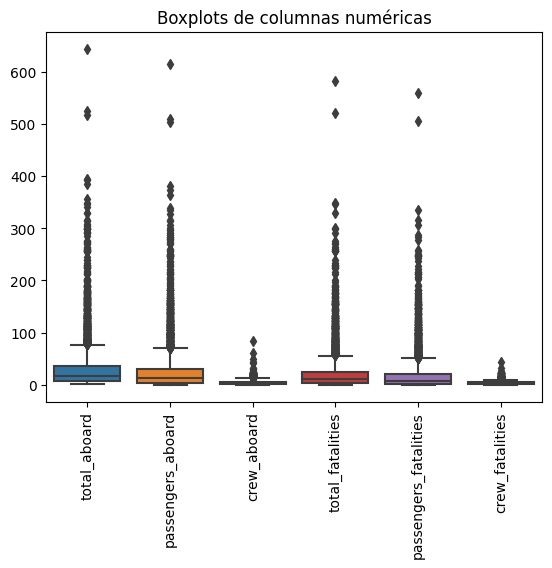

In [69]:
# Graficamos 
sns.boxplot(data=df[['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities']])
plt.title('Boxplots de columnas numéricas')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Observamos outliers en todas las columnas pero haremos un análisis de la conveniencia del filtrado más adelante

### e) Creación de nuevos campos

C1 'season'

In [71]:
#pip install geopy

In [72]:
# Creamos un campo nuevo con la estación del año del accidente

from geopy.geocoders import Nominatim

# Definimos la función que clasificará en qué hemisferio se encuentra el país ingresado, para no hacerlo manualmente
def clasificar_hemisferio(pais):
    geolocator = Nominatim(user_agent="my-app")
    location = geolocator.geocode(pais)

    if location is None:
        return "No se pudo determinar la ubicación del país."
    
    latitud = location.latitude

    if latitud >= 0:
        return "Hemisferio Norte"
    else:
        return "Hemisferio Sur"

In [ ]:
# A la lista de paises creada previamente le aplicamos la función de clasificación

hemisferios = {}
for pais in lista_paises:
    resultado = clasificar_hemisferio(pais)
    hemisferios[pais] = resultado

hemisferios

In [74]:
# Creamos un campo nuevo con el hemisferio donde se encuentra cada país.
df['hemisphere'] = df['country'].map(hemisferios)

df.tail()

,date,time,location,airline_operator,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,category,tipo_aeronave,hemisphere
5003,2021-03-28,18:35,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,6.0,5.0,1.0,5,4.0,1.0,The sightseeing helicopter crashed after missi...,United States,non-military,avion,Hemisferio Norte
5004,2021-05-21,,"Near Kaduna, Nigeria",Military - Nigerian Air Force,,Beechcraft B300 King Air 350i,11.0,7.0,4.0,11,7.0,4.0,"While on final approach, in poor weather condi...",Niger,military,avion,Hemisferio Norte
5005,2021-06-10,,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,14.0,12.0,2.0,12,11.0,1.0,The plane was carrying military personnel and ...,Myanmar,military,avion,Hemisferio Norte
5006,2021-07-04,,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96.0,88.0,8.0,50,NaN,NaN,"While attempting to land at Jolo Airport, the ...",Philippines,military,avion,Hemisferio Norte
5007,2021-07-06,,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,28.0,22.0,6.0,28,22.0,6.0,The passenger plane crashed into the top of a ...,Russia,non-military,avion,Hemisferio Norte


In [76]:
from datetime import datetime

# Creamos la función de clasificación de estación: según el hemisferio del país y la fecha podemos calcular qué estación era en el momento del accidente.
def clasificar_estacion(row):
    df['date_season'] = pd.to_datetime(df['date']).dt.date

    date_sns = str(row['date_season'])
    hemisferio = row['hemisphere']

    fecha = datetime.strptime(date_sns, "%Y-%m-%d")
    mes = fecha.month
         
    if hemisferio == 'Hemisferio Norte':
        if mes >= 3 and mes <= 5:
            return 'Primavera'
        elif mes >= 6 and mes <= 8:
            return 'Verano'
        elif mes >= 9 and mes <= 11:
            return 'Otoño'
        else:
            return 'Invierno'
    elif hemisferio == 'Hemisferio Sur':
        if mes >= 3 and mes <= 5:
            return 'Otoño'
        elif mes >= 6 and mes <= 8:
            return 'Invierno'
        elif mes >= 9 and mes <= 11:
            return 'Primavera'
        else:
            return 'Verano'
    else:
        return 'Estación no detectada'
    
df['season'] = df.apply(clasificar_estacion, axis=1)

df['season']


0                       Otoño
1                       Otoño
2                      Verano
3                      Verano
4       Estación no detectada
                ...          
5003                Primavera
5004                Primavera
5005                   Verano
5006                   Verano
5007                   Verano
Name: season, Length: 4986, dtype: object

In [77]:
df['season'].value_counts()

Invierno                 1243
Otoño                    1230
Verano                   1147
Primavera                1067
Estación no detectada     299
Name: season, dtype: int64

C2 'surface_type'

In [78]:
# Creamos un campo nuevo con el tipo de superficie donde cae el avión

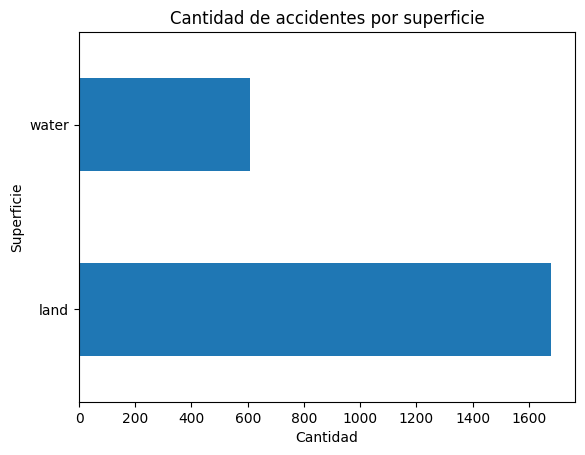

In [79]:
# Basada en la descripción

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

surfaces = {
    'water': ['sea', 'ocean', 'river', 'lake'],
    'land': ['ground', 'mountain', 'struck', 'tree', 'house']
}

# Crear un diccionario para almacenar los conteos de cada categoría
surface_counts = {surface: 0 for surface in surfaces}

# Iterar a través de cada resumen
for summary in df['summary']:
    # Convertir el resumen en minúsculas para una comparación de cadenas de texto consistentes
    summary = summary.lower()

    # Iterar a través de cada categoría y sus palabras clave
    for surface, keywords in surfaces.items():
        # Si alguna de las palabras clave aparece en el resumen, incrementar el conteo para esa categoría
        if any(keyword in summary for keyword in keywords):
            surface_counts[surface] += 1


# Crear un DataFrame a partir de los conteos de cada categoría
surface_df = pd.DataFrame.from_dict(surface_counts, orient='index', columns=['count'])
# Ordenar el DataFrame en orden descendente
surface_df = surface_df.sort_values(by='count', ascending=False)
# Crear un gráfico de barras para mostrar los conteos de cada categoría
surface_df.plot(kind='barh', legend=False)
plt.xlabel('Cantidad')
plt.ylabel('Superficie')
plt.title('Cantidad de accidentes por superficie')
plt.show()

C3: 'accident_type'

In [80]:
# Creamos un campo nuevo con el motivo de accidente (basado en la descripción)

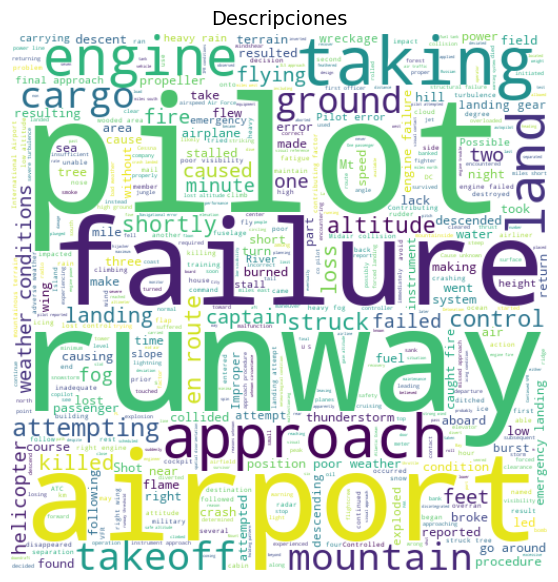

In [81]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.summary.tolist())
plane_mask = np.array(Image.open('plane.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Descripciones', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()


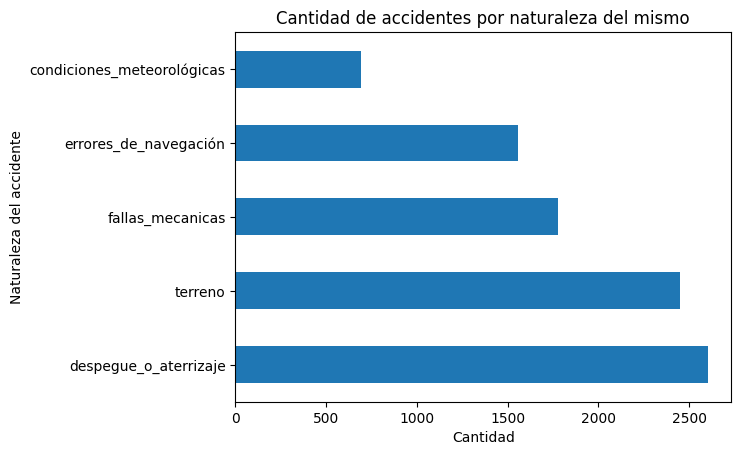

In [82]:
# Creamos un diccionario para almacenar los conteos de cada categoría
categories = {
    'despegue_o_aterrizaje': ['attempting', 'approach', 'takeoff', 'landing', 'runway', 'taking'],
    'terreno': ['ground', 'mountain', 'collided', 'struck', 'altitude', 'area', 'sea', 'tree', 'water'],
    'fallas_mecanicas': ['engine', 'failure', 'engine failure', 'fire', 'flame', 'fuel', 'broke'],
    'condiciones_meteorológicas': ['weather conditions', 'fog', 'poor weather'],
    'errores_de_navegación': ['en route', 'lost', 'control', 'stalled', 'flew']
}

category_counts = {category: 0 for category in categories}

# Iteramos a través de cada descripción
for summary in df['summary']:
    # Convertimos el resumen en minúsculas para una comparación de cadenas de texto consistentes
    summary = summary.lower()

    # Iteramos a través de cada categoría y sus palabras clave
    for category, keywords in categories.items():
        # Si alguna de las palabras clave aparece en el resumen, incrementar el conteo para esa categoría
        if any(keyword in summary for keyword in keywords):
            category_counts[category] += 1


# Creamos un DataFrame a partir de los conteos de cada categoría
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['count'])
category_df = category_df.sort_values(by='count', ascending=False)
category_df.plot(kind='barh', legend=False)
plt.xlabel('Cantidad')
plt.ylabel('Naturaleza del accidente')
plt.title('Cantidad de accidentes por naturaleza del mismo')
plt.show()

In [83]:
# Creamos un nuevo campo en el dataset según el tipo de accidente

def find_category(description):
    word_counts = {}
    for category, words in categories.items():
        count = sum(description.count(word) for word in words)
        word_counts[category] = count
    max_count = max(word_counts.values())
    for category, count in word_counts.items():
        if count == max_count:
            return category

df['accident_type'] = df['summary'].apply(find_category)
df['accident_type']

0                          terreno
1            errores_de_navegación
2                          terreno
3            despegue_o_aterrizaje
4            errores_de_navegación
                   ...            
5003                       terreno
5004    condiciones_meteorológicas
5005    condiciones_meteorológicas
5006         despegue_o_aterrizaje
5007         despegue_o_aterrizaje
Name: accident_type, Length: 4986, dtype: object

## 3) Análisis descriptivo

##### Análisis cuantitativo

In [84]:
df.describe()

,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities
count,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000
mean,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691
std,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000


In [85]:
# Se puede ver que hay una gran diferencia entre los valores máximos respecto a la media, por lo que haremos un análisis de outliers.
# Más allá de eso, vemos que la mayor cantidad de fallecidos y de personas a bordo se encuentran en grupos de menos de 35 personas en su mayoría.

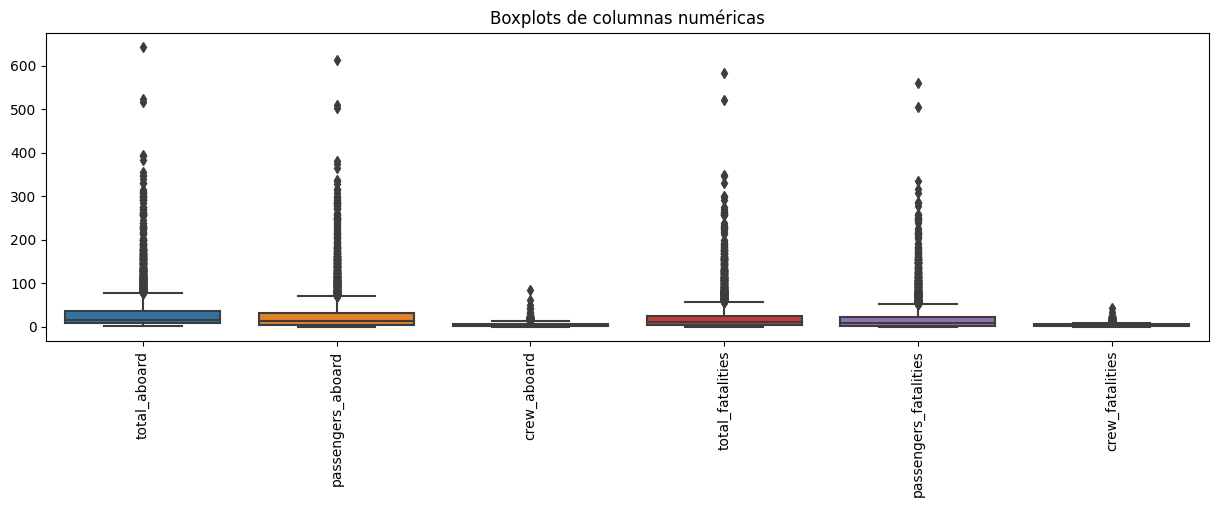

In [86]:
# Graficamos 
plt.figure(figsize=(15,4))
sns.boxplot(data=df[['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities']])
plt.title('Boxplots de columnas numéricas')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Para un correcto análisis de outliers, se buscó los accidentes con mayor cantidad de fatalidades en la historia.
# Se encontró el accidente con más fatalidad tuvo 583 víctimas, donde dos aviones chocaron entre sí. Para no ahondar en detalles del suceso, 
# nos limitamos a decir que si bien claramente es un outlier, decidimos dejar los datos ya que no son valores erróneos.

Pasajeros

In [88]:
print('Suma total de pasajeros en accidentes:' , df['passengers_aboard'].sum())
print('Suma total de pasajeros fallecidos:' , df['passengers_fatalities'].sum())
print('Tasa de supervicencia de pasajeros: ', round(df['passengers_fatalities'].sum()/df['passengers_aboard'].sum(),3))


Suma total de pasajeros en accidentes: 128661.0
Suma total de pasajeros fallecidos: 90399.0
Tasa de supervicencia de pasajeros:  0.703


Tripulación

In [89]:
print('Suma total de tripulación en accidentes:' , df['crew_aboard'].sum())
print('Suma total de tripulación fallecidos:' , df['crew_fatalities'].sum())
print('Tasa de supervicencia de tripulación: ', round(df['crew_fatalities'].sum()/df['crew_aboard'].sum(),3))

Suma total de tripulación en accidentes: 21640.0
Suma total de tripulación fallecidos: 17118.0
Tasa de supervicencia de tripulación:  0.791


Total

In [90]:
print('Suma total de personas en accidentes:' , df['total_aboard'].sum())
print('Suma total de personas fallecidos:' , df['total_fatalities'].sum())
print('Tasa de supervicencia de personas: ', round(df['total_fatalities'].sum()/df['total_aboard'].sum(),3))

Suma total de personas en accidentes: 155326.0
Suma total de personas fallecidos: 111397
Tasa de supervicencia de personas:  0.717


In [91]:
print('Hay:' , round(df['passengers_aboard'].sum()/df['crew_aboard'].sum(),2) , 'veces más de pasajeros que tripulación.')

Hay: 5.95 veces más de pasajeros que tripulación.


In [92]:
# Podemos ver que hay una hay casi 6 veces más de pasajeros que de tripulación, pero la yasa de supervicencia es ligeramente mayor para la tripulación que para los pasajeros.

Matriz de correlación

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\1217810481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

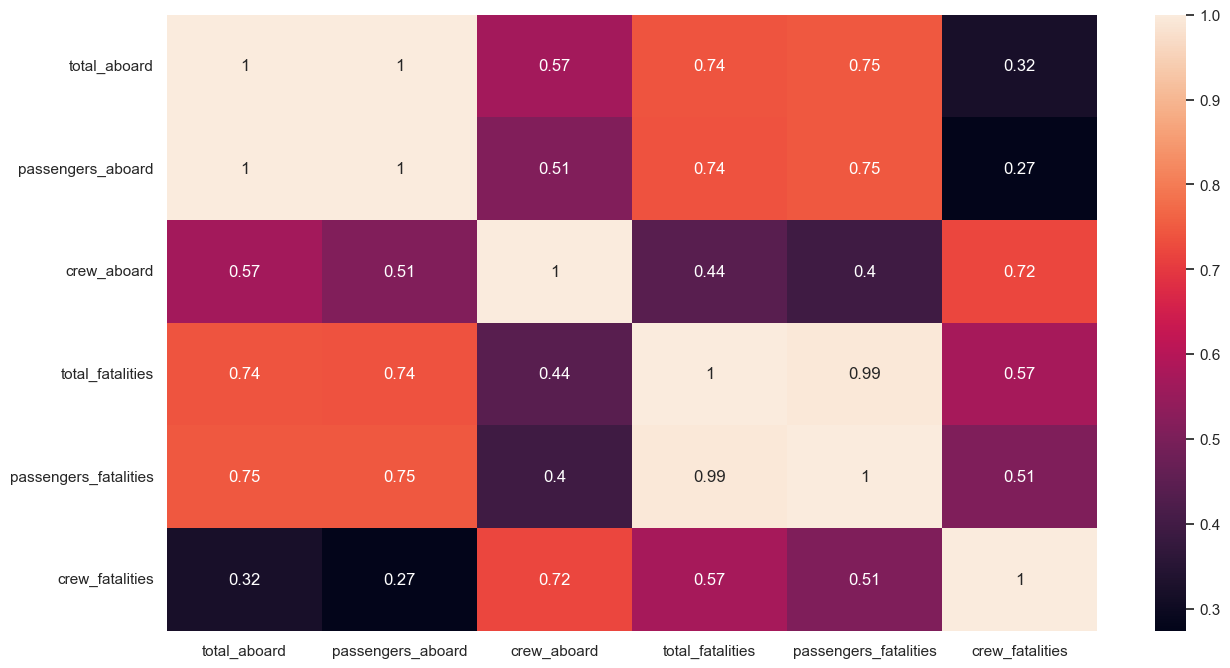

In [93]:
# Hacemos la matriz de correlación
correlation=df.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True
) 


In [94]:
# La matriz de correlación muestra cómo se relacionan las variables entre sí.
# Para este análisis vemos variables que están estrechamente relacionadas entre ellas, con justa razon,
# ya que a mayor personas a bordo, obviamente habrán mayor cantidad de pasajeros y tripulación, como también habrá mas chances de fatalidad.

#### Análisis descriptivo

A1: Accidentes por año


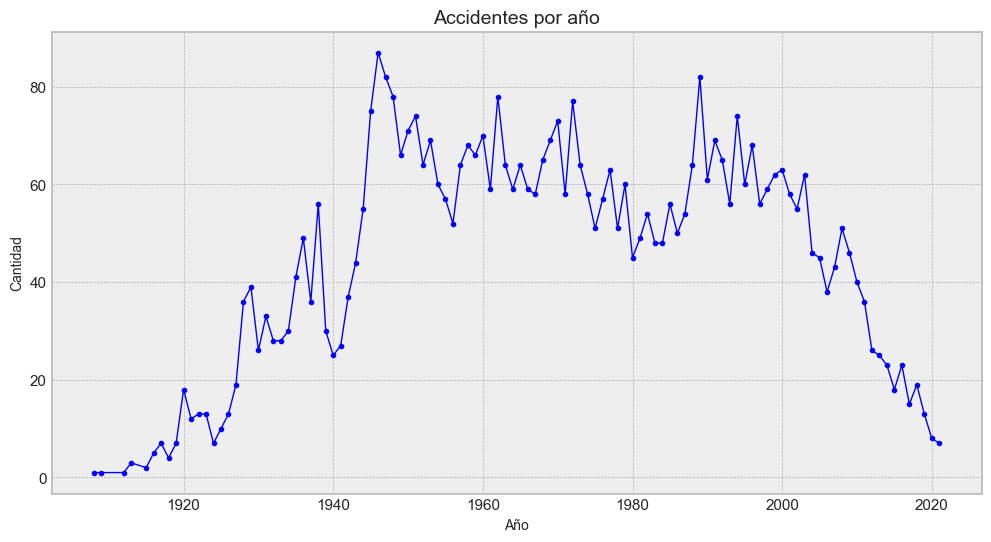

In [95]:
Temp = df.groupby(df.date.dt.year)[['date']].count() 
Temp = Temp.rename(columns={"date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Accidentes por año', loc='Center', fontsize=14)
plt.show()

In [96]:
# Se puede ver en el gráfico que el periodo de mayor cantidad de accidentes es entre 1945 y 2000.

A2: Accidentes por mes y día

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17968\2159232385.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


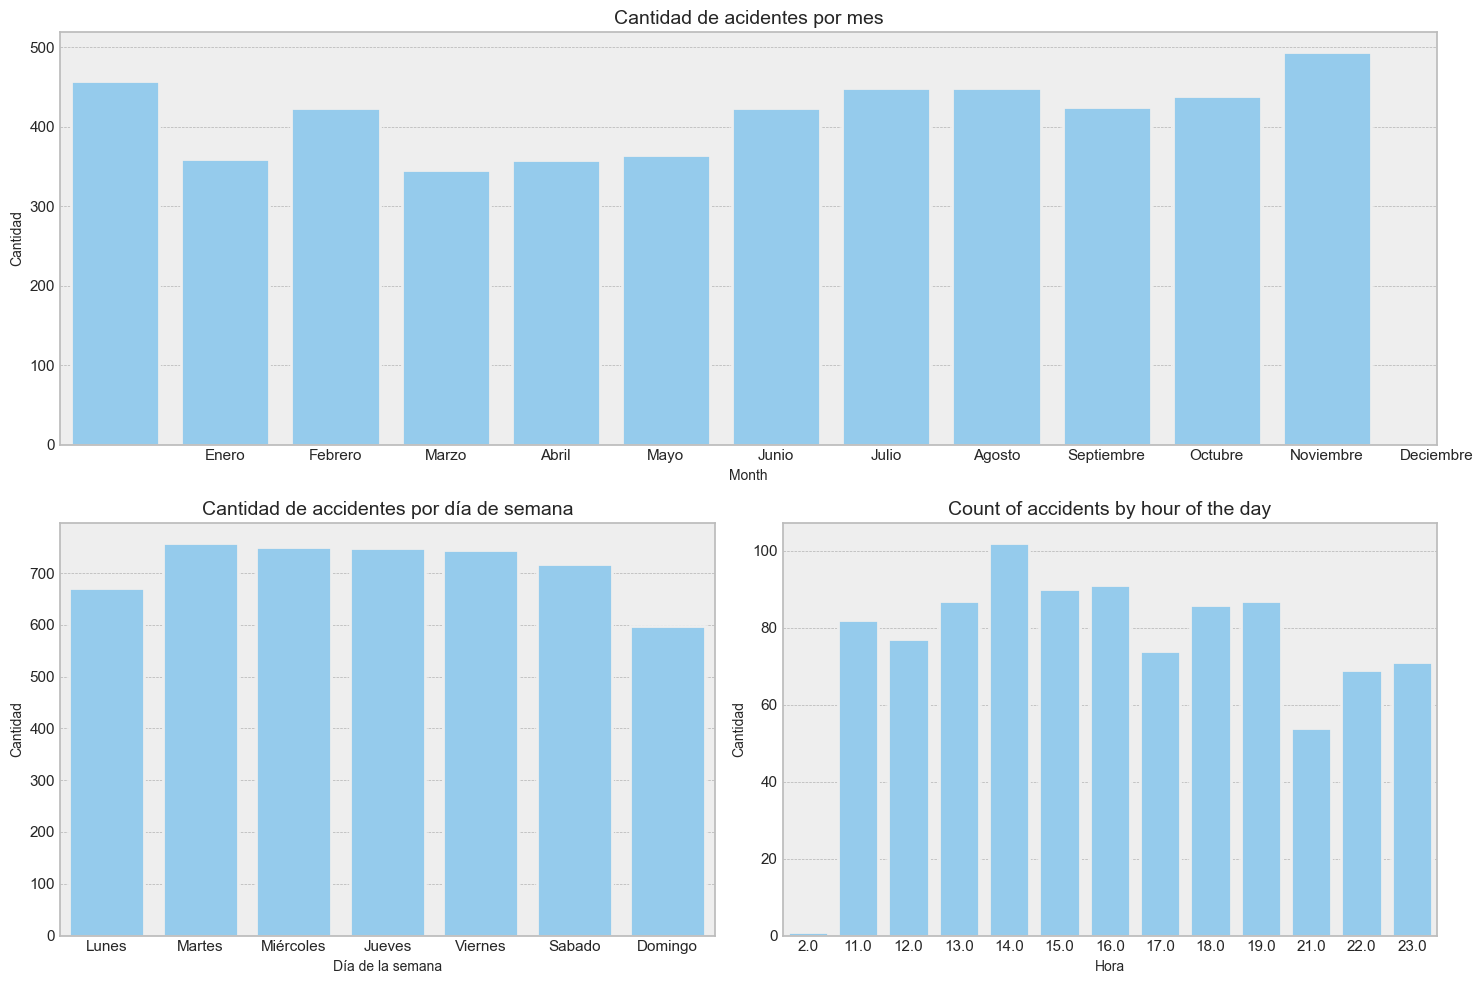

In [97]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15, 10))
plt.style.use('seaborn-muted')

ax = pl.subplot(gs[0, :])
sns.barplot(x=df.groupby(df.date.dt.month)[['date']].count().index, y='date', data=df.groupby(df.date.dt.month)[['date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(df.groupby(df.date.dt.month)[['date']].count().index, ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Deciembre'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Cantidad de acidentes por mes', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(x=df.groupby(df.date.dt.weekday)[['date']].count().index, y='date', data=df.groupby(df.date.dt.weekday)[['date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(df.groupby(df.date.dt.weekday)[['date']].count().index, ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo'])
plt.xlabel('Día de la semana', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Cantidad de accidentes por día de semana', loc='Center', fontsize=14)

df['time'] = pd.to_datetime(df['time'])
ax = pl.subplot(gs[1, 1])
sns.barplot(x=df[df.time.dt.hour != 0].groupby(df.time.dt.hour)[['time']].count().index, y='time', data=df[df.time.dt.hour != 0].groupby(df.time.dt.hour)[['time']].count(), color='lightskyblue', linewidth=2)
plt.xlabel('Hora', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Count of accidents by hour of the day', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

In [98]:
# Podemos ver en los gráficos de barra que la cantidad de accidentes según el periodo es bastante constante, ningún mes, día u hora particular se resalta demasiado del resto.

A3: Accidentes según país

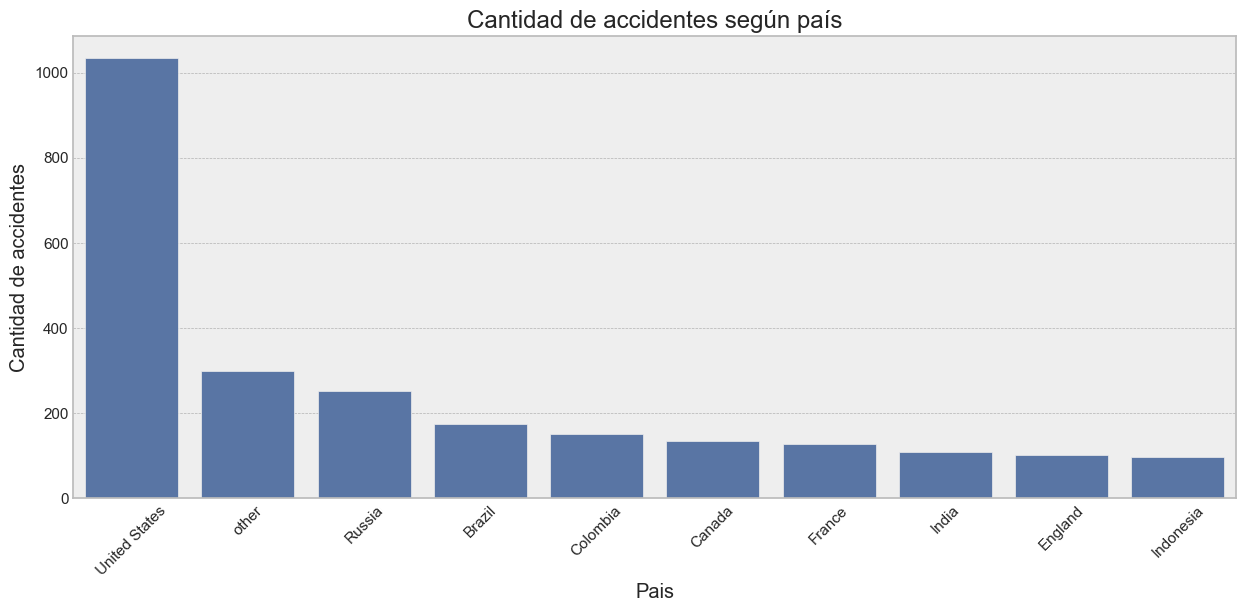

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_ac = df['country'].value_counts().sort_values(ascending=False) 
tipo_ac = tipo_ac.head(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, color='b', order=tipo_ac.index) 
plt.xticks(rotation=45)
plt.xlabel('Pais')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes según país')
plt.show()

In [100]:
# Del gráfico vemos que claramente Estados Unidos ha tenido una mayor cantidad de accidentes respecto al resto de países.

A4: Accidentes según la estación del año

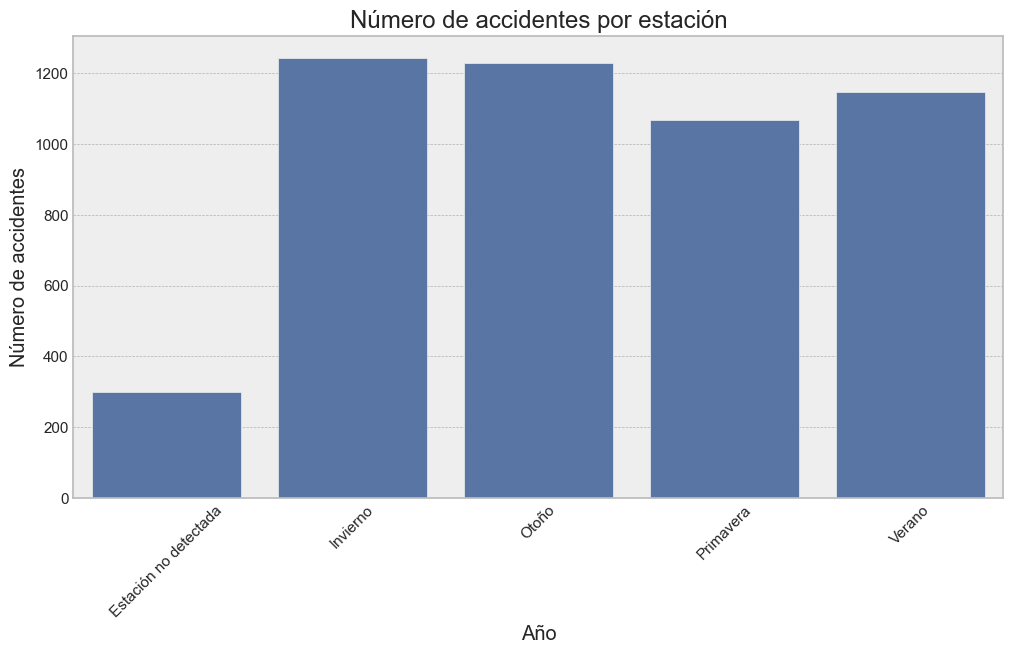

In [101]:
estacion = df['season'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=estacion.index, y=estacion.values, color='b')
plt.xticks(rotation=45)

plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por estación')

plt.show()

In [102]:
# Podemos ver en el gráfico que no varía demasiado la cantidad de accidentes según la estación del año.

A5: Accidentes según tipo de aeronave

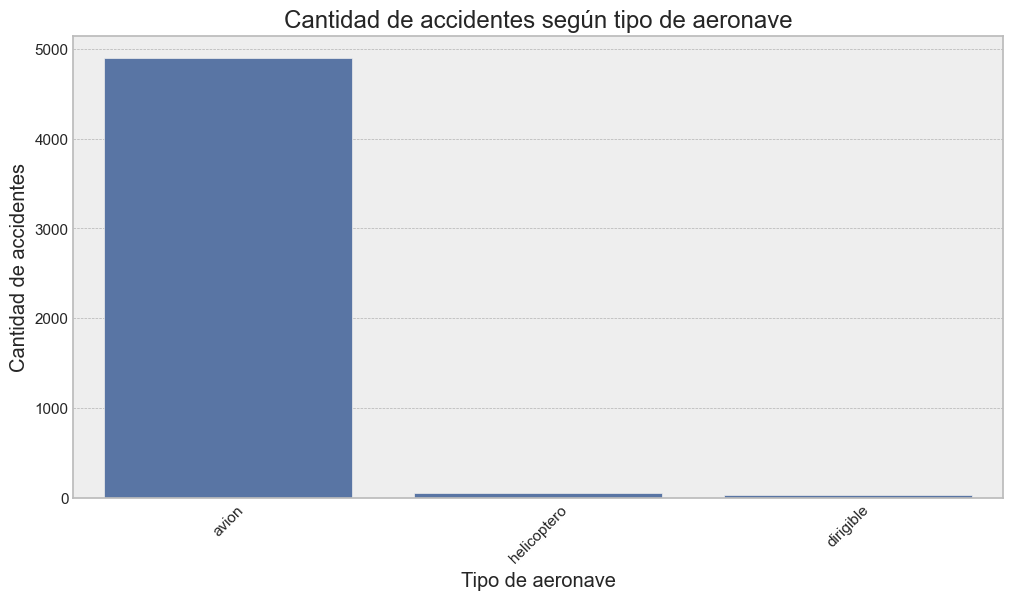

In [103]:
tipo_ac = df['tipo_aeronave'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(12, 6))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, color='b')
plt.xticks(rotation=45)

plt.xlabel('Tipo de aeronave')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes según tipo de aeronave')

plt.show()

In [104]:
# Se nota una clara predominancia de aeronaves tipo avión.

A6: Accidentes según el tipo de superficie

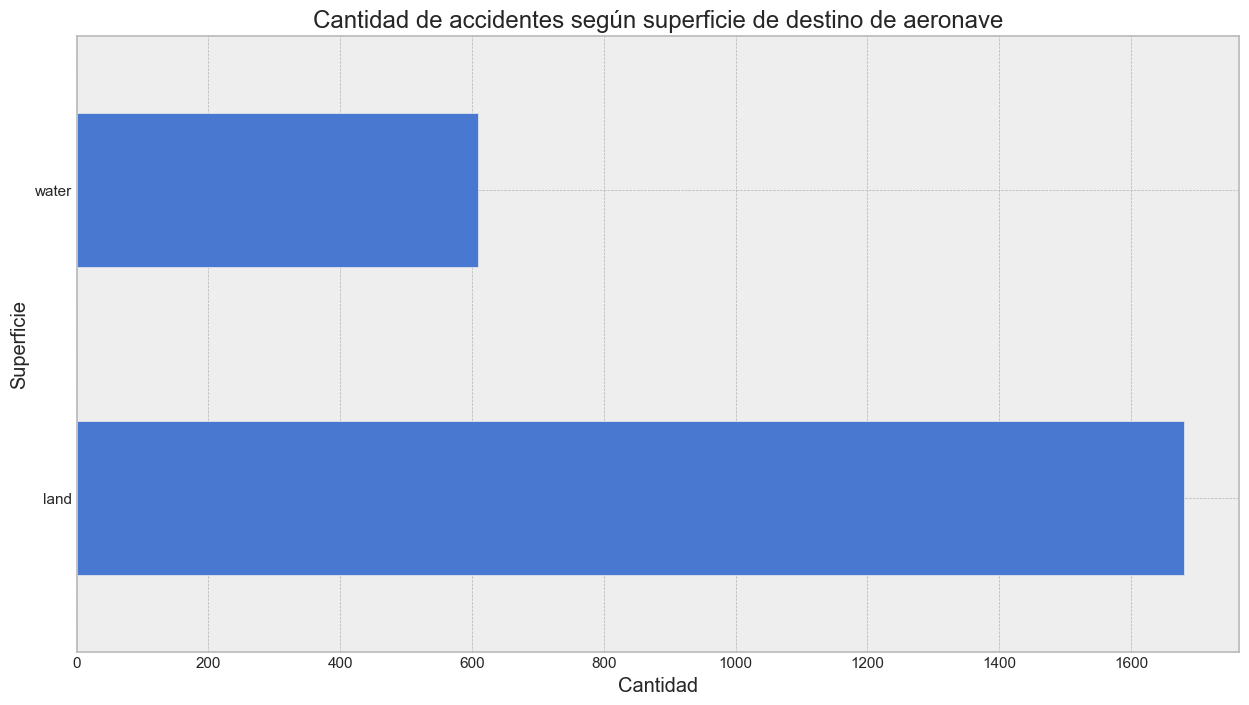

In [105]:
# Basada en la descripción

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

surfaces = {
    'water': ['sea', 'ocean', 'river', 'lake'],
    'land': ['ground', 'mountain', 'struck', 'tree', 'house']
}

# Crear un diccionario para almacenar los conteos de cada categoría
surface_counts = {surface: 0 for surface in surfaces}

# Iterar a través de cada resumen
for summary in df['summary']:
    # Convertir el resumen en minúsculas para una comparación de cadenas de texto consistentes
    summary = summary.lower()

    # Iterar a través de cada categoría y sus palabras clave
    for surface, keywords in surfaces.items():
        # Si alguna de las palabras clave aparece en el resumen, incrementar el conteo para esa categoría
        if any(keyword in summary for keyword in keywords):
            surface_counts[surface] += 1


# Crear un DataFrame a partir de los conteos de cada categoría
surface_df = pd.DataFrame.from_dict(surface_counts, orient='index', columns=['count'])
# Ordenar el DataFrame en orden descendente
surface_df = surface_df.sort_values(by='count', ascending=False)
# Crear un gráfico de barras para mostrar los conteos de cada categoría
surface_df.plot(kind='barh', legend=False)
plt.xlabel('Cantidad')
plt.ylabel('Superficie')
plt.title('Cantidad de accidentes según superficie de destino de aeronave')
plt.show()

In [106]:
# Notamos que la mayor cantidad de accidentes culminó en el suelo, pero hay que tener en cuenta que muchos datos no han sido clasificados.

A7: Accidentes según modelo la aeronave

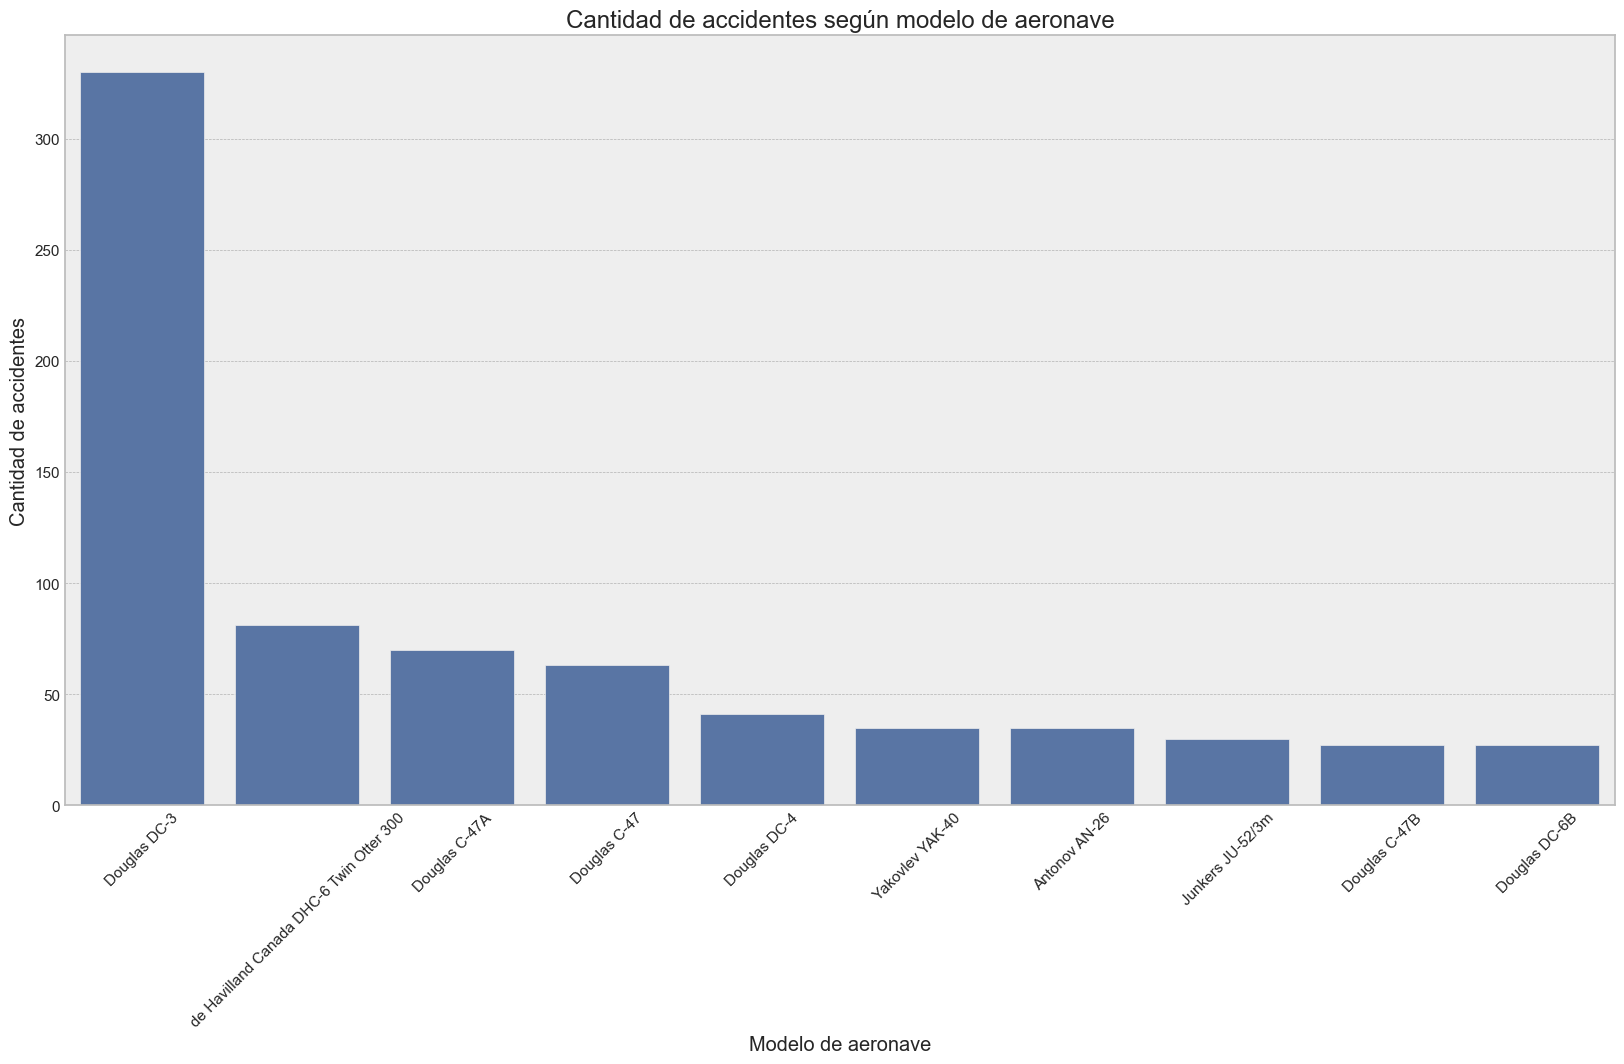

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_ac = df['aircraft_type'].value_counts().sort_values(ascending=False)
tipo_ac = tipo_ac.head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, color='b', order=tipo_ac.index) 
plt.xticks(rotation=45)
plt.xlabel('Modelo de aeronave')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes según modelo de aeronave')
plt.show()

In [108]:
# No sólo se ve que Douglas DC-3 ha sido el tipo de aeronave con mayor cantidad de accidentes, sino la marca 'Douglas' se ve muy presente en este top 10.

A8: Fatalidades por año

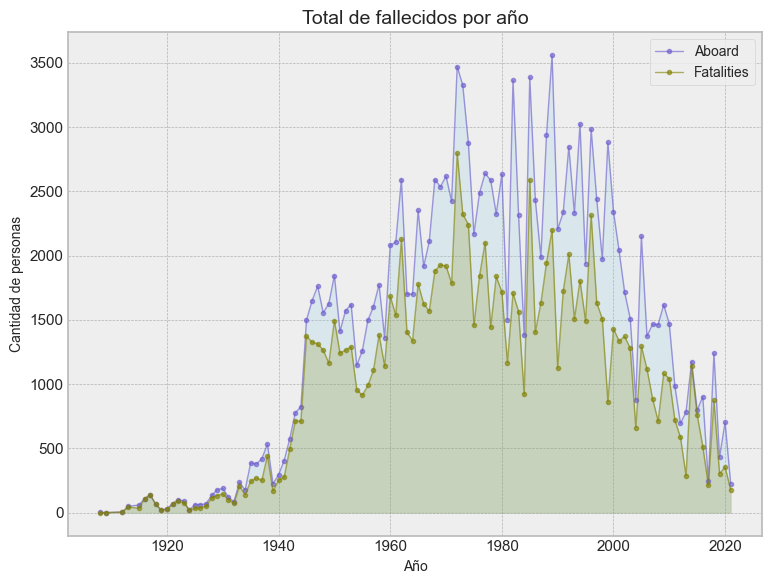

In [109]:
# Convertir la columna 'Fatalities' y 'Aboard' a tipo numérico si no lo están
df['Fatalities'] = pd.to_numeric(df['total_fatalities'])
df['Aboard'] = pd.to_numeric(df['total_aboard'])

# Agrupar por año y sumar las columnas necesarias
Fatalities = df.groupby(df.date.dt.year)[['Fatalities', 'Aboard']].sum()

# Calcular la proporción
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

# Crear el gráfico
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker=".", color="Slateblue", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker=".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad de personas', fontsize=10)
plt.title('Total de fallecidos por año', loc='Center', fontsize=14)



plt.tight_layout()
plt.show()

In [110]:
# Vemos que el gráfico tiene una forma silimar al gráfico de 'Accidentes por año', con justa razón.
# También podemos observar que entre mayor cantidad de personas a bordo, menos probabilidad de fatalidad hay:
#   En los años donde hubieron pocas personas a bordo, la cantidad de fatalidades fue casi igual al total de personas.

A9: Fatalidades por pais

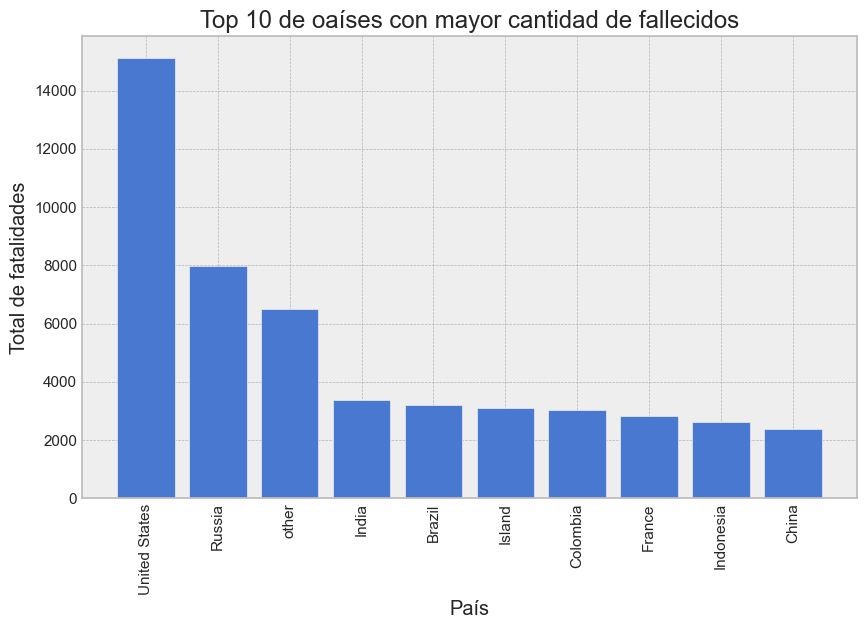

In [111]:
# Agrupar los datos por país y sumar las fatalidades
df_grouped = df.groupby('country')['total_fatalities'].sum().reset_index()

# Ordenar los países por la suma de fatalidades en orden descendente
df_grouped = df_grouped.sort_values('total_fatalities', ascending=False)

# Tomar solo el top 10 de países
top_10_countries = df_grouped.head(10)

# Crear el gráfico de barras para el top 10 de países
plt.figure(figsize=(10, 6))  # Tamaño opcional para ajustar el gráfico
plt.bar(top_10_countries['country'], top_10_countries['total_fatalities'])
plt.xlabel('País')
plt.ylabel('Total de fatalidades')
plt.title('Top 10 de oaíses con mayor cantidad de fallecidos')

# Rotar las etiquetas del eje x si hay muchos países para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [112]:
# Nos velvemos a encontrar en el top a algunos países, como Estados Unidos, Rusia, Brazil, Colombia, Francia e Indonesia.

A10: Cantidad de vuelos comerciales vs vuelos militares

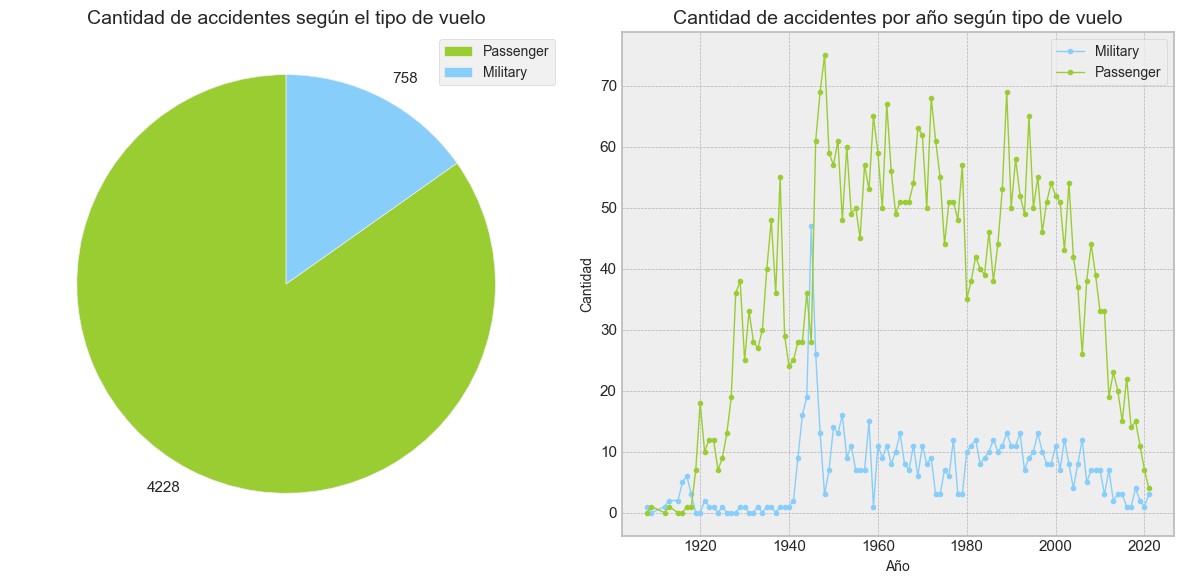

In [113]:
df.airline_operator = df.airline_operator.str.upper()

Temp = df.copy()
Temp['isMilitary'] = Temp.airline_operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = df.copy()
Temp2['Military'] = Temp2.airline_operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['date', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.date.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Cantidad de accidentes según el tipo de vuelo', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Cantidad de accidentes por año según tipo de vuelo', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

In [114]:
# Vemos que los vuelos militares y comerciaels tuvieron una distribución similar de accidentes que los accidentes totales,

A11: Cantidad de accidentes según su naturaleza

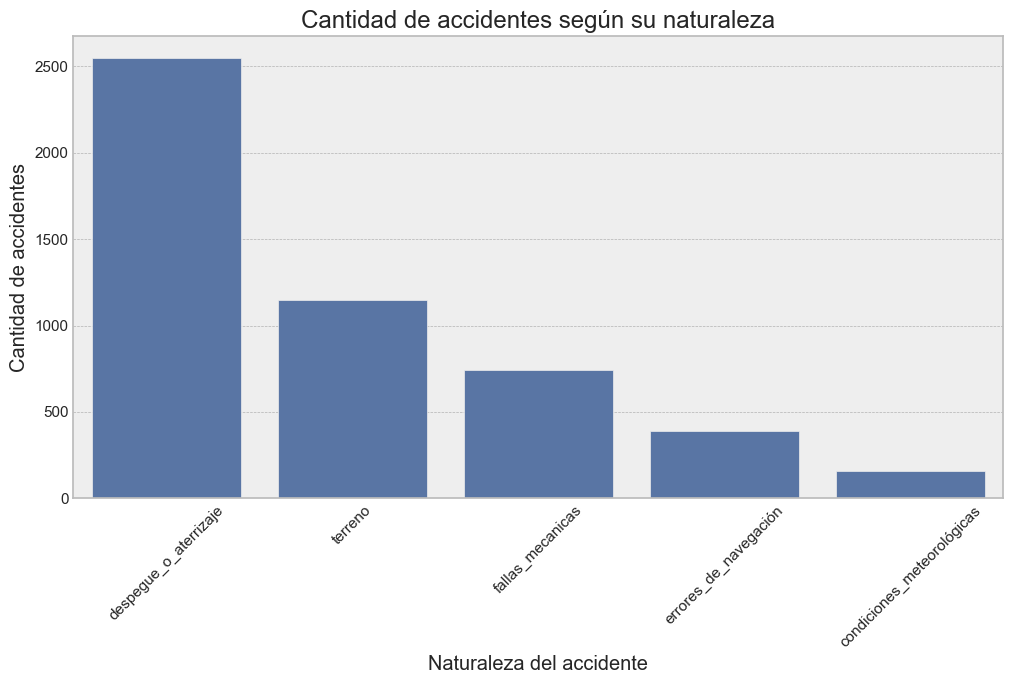

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

tipo_ac = df['accident_type'].value_counts().sort_values(ascending=False) 
plt.figure(figsize=(12, 6))
sns.barplot(x=tipo_ac.index, y=tipo_ac.values, color='b', order=tipo_ac.index) 
plt.xticks(rotation=45)
plt.xlabel('Naturaleza del accidente')
plt.ylabel('Cantidad de accidentes')
plt.title('Cantidad de accidentes según su naturaleza')
plt.show()


In [116]:
# Vemos que los accidentes provocados por probleas de despegue o aterrizaje son casi la mitad de los accidentes totales.

A12: Tasa de fallecidos sober total de personas a bordo

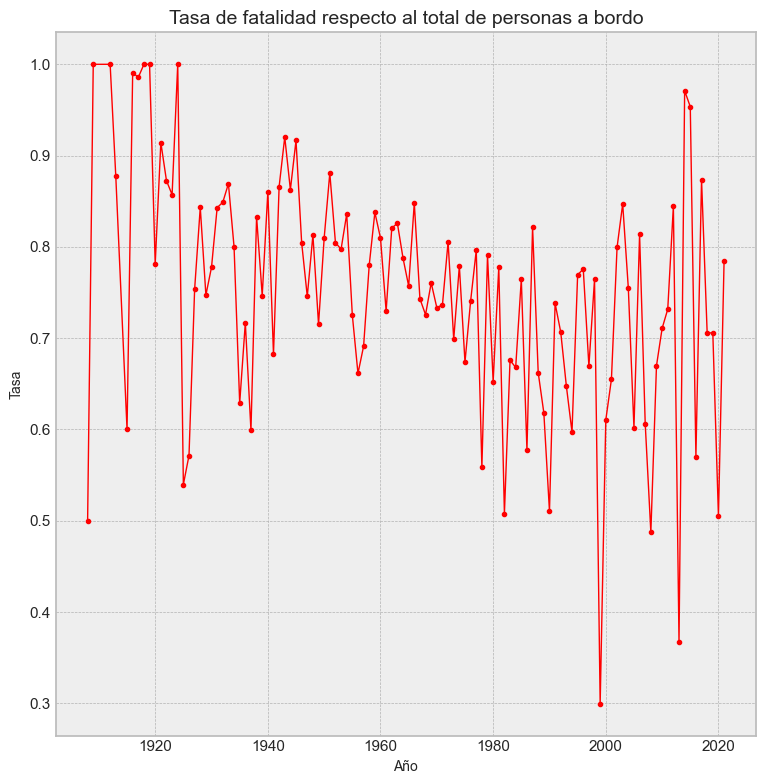

In [117]:
plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker=".", color='red', linewidth=1)
plt.xlabel('Año', fontsize=10)
plt.ylabel('Tasa', fontsize=10)
plt.title('Tasa de fatalidad respecto al total de personas a bordo', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

## KPI

### KPI: Reducir en 5% la tasa de mortalidad a nivel anual

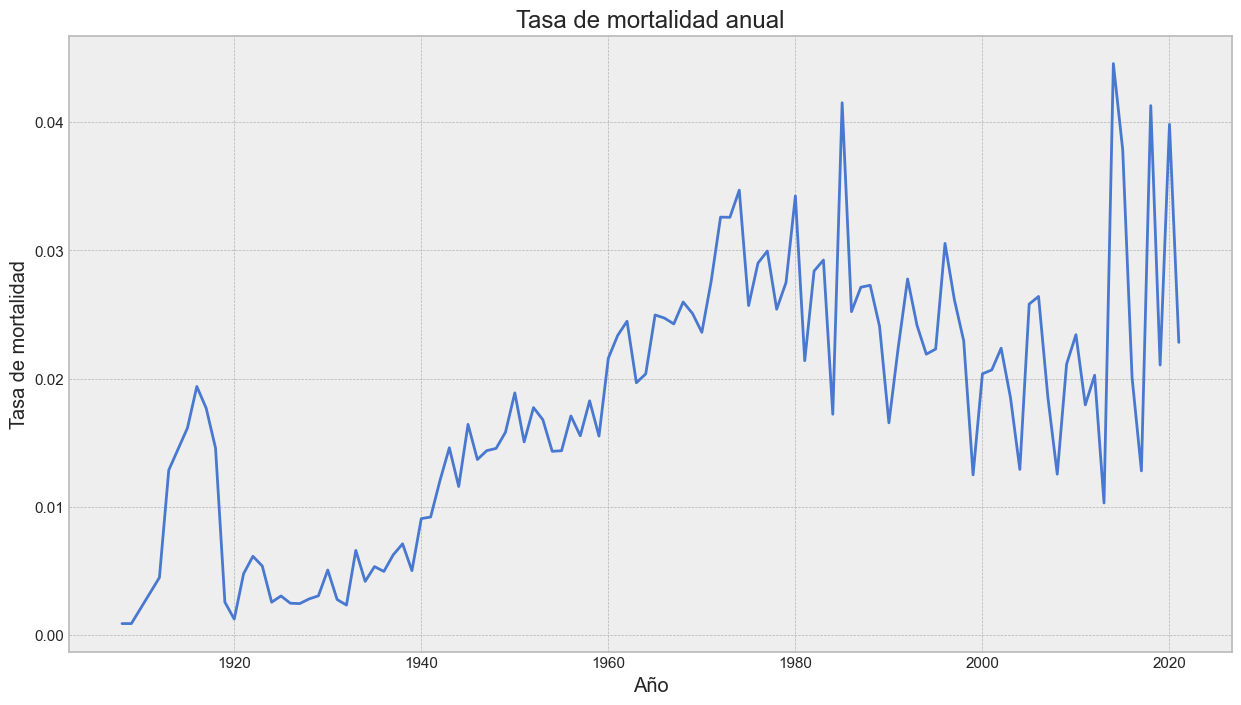

In [118]:
# El objetivo de este KPI solicitado es: reducir en 5% la tasa de mortalidad a nivel anual, 
# siendo el número de fallecidos en los accidentes aéreos respecto al total de personas en los vuelos involucrados.

#Grafico el KPI:

df['year'] = df['date'].dt.year
df['mortality_rate'] = (df['total_fatalities'] / df['total_fatalities'].sum())*100
mortality_by_year = df.groupby('year')['mortality_rate'].mean()

plt.plot(mortality_by_year.index, mortality_by_year.values)
plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Tasa de mortalidad anual')
plt.show()



### KPIs propuestos

KPI 1: Reducir la tasa de accidentes en despegues o aterrizajes en un 10% anual.

In [125]:
# Métrica: Tasa de accidentes según su naturaleza.

KPI 2: Reducir 5% anualmente la tasa de accidentes de Estados Unidos respecto al resto de los paises.

In [123]:
# Métrica: Tasa de accidentes según el origen/pais.

KPI 3: Aumentar 5% anualmente la tasa de supervicencia en las aerolíneas con mayor cantidad de fallecidos.

In [119]:
# Métrica: tasa de supervicencia según el operador (aerolínea).

## Exporto a el dataset

In [127]:
df.to_csv("dataframe_powerbi", sep=',',index=False)